In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('bank-full.csv', delimiter=";")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
cols_of_interest = ['age', 'job', 'marital', 'education', 'balance', 'housing',
      'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
df = df[cols_of_interest]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:

df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.y = (df.y == 'yes').astype(int)

In [12]:

df_full_train, df_test = train_test_split(df, test_size=.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=20/80, random_state=1)
print(f"Split DF len (Full Train, Train, Val, Test): {len(df_full_train), len(df_train), len(df_val), len(df_test)}")

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.pop('y')
y_train = df_train.pop('y')
y_val = df_val.pop('y')
y_test = df_test.pop('y')
print(f"Y DF len (Full Train, Train, Val, Test): {len(y_full_train), len(y_train), len(y_val), len(y_test)}")

Split DF len (Full Train, Train, Val, Test): (36168, 27126, 9042, 9043)
Y DF len (Full Train, Train, Val, Test): (36168, 27126, 9042, 9043)


In [13]:
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y']

In [16]:
numerical = list(set(df.columns) - set(categorical))
numerical

['previous', 'campaign', 'day', 'balance', 'age', 'pdays', 'duration']

In [17]:
# Q1

In [18]:
from sklearn.metrics import roc_auc_score

In [31]:
scores = {}
for col in numerical:
    score = roc_auc_score(y_train, df_train[col])
    print(f" {col} AUC score: {score}")
    scores.update({col: score})
max_col = max(scores, key=scores.get)
max_val = scores[max_col]
print(f"\n ** Max: {max_col}: {max_val} ")

 previous AUC score: 0.5985653242764153
 campaign AUC score: 0.42854569843178414
 day AUC score: 0.474042117616092
 balance AUC score: 0.5888313805382317
 age AUC score: 0.48781428247265596
 pdays AUC score: 0.5901276247352144
 duration AUC score: 0.8147002759670778

 ** Max: duration: 0.8147002759670778 


In [24]:
# => duration

In [32]:
# Q2

In [42]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0,  max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:,1]


In [45]:
round(roc_auc_score(y_val, y_pred >= 0.5), 3)

np.float64(0.656)

In [46]:
# => closer to .69

In [47]:
# Q3


In [51]:
thresholds = np.arange(0.0, 1.01, 0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [66]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = y_pred >= t
    predicted_negative = y_pred < t

    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append((t, precision, recall))

scores_df = pd.DataFrame(scores, columns=['threshold', 'precision', 'recall'])    

/var/folders/zn/nr4dngtd7r9046m_s7578mjh0000gq/T/ipykernel_55948/2695634695.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [67]:
scores_df

,threshold,precision,recall
0,0.00,0.121433,1.000000
1,0.01,0.135901,0.996357
2,0.02,0.159306,0.995446
3,0.03,0.186470,0.989071
4,0.04,0.220227,0.971767
...,...,...,...
96,0.96,0.653061,0.029144
97,0.97,0.625000,0.022769
98,0.98,0.687500,0.020036
99,0.99,0.625000,0.009107


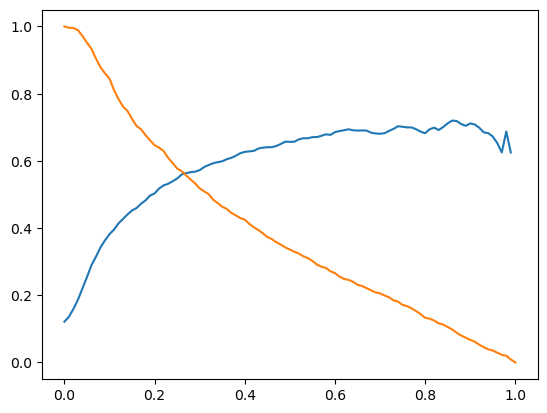

In [68]:
plt.plot(scores_df['threshold'], scores_df['precision'])
plt.plot(scores_df['threshold'], scores_df['recall'])

In [78]:
# .265

In [69]:
#Q4

In [75]:
f1_scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = y_pred >= t
    predicted_negative = y_pred < t

    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    f1_score = 2 * (p * r) / (p + r)

    f1_scores.append((t, f1_score))

/var/folders/zn/nr4dngtd7r9046m_s7578mjh0000gq/T/ipykernel_55948/2338489832.py:14: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [76]:
f1_df = pd.DataFrame(f1_scores, columns=['threshold', 'f1_score'])
f1_df

,threshold,f1_score
0,0.00,0.216568
1,0.01,0.239178
2,0.02,0.274658
3,0.03,0.313782
4,0.04,0.359078
...,...,...
96,0.96,0.055798
97,0.97,0.043937
98,0.98,0.038938
99,0.99,0.017953


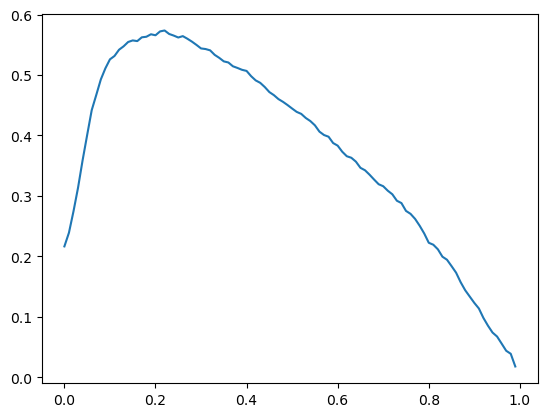

In [77]:
plt.plot(f1_df['threshold'], f1_df['f1_score'])

In [79]:
# Max: .22

In [92]:
# Q5

In [93]:
import tqdm
from sklearn.model_selection import KFold

In [99]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [113]:
def train(df_t, y_t, c=1.0):
    dicts = df_t.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_t = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_t, y_t)

    return dv, model

In [114]:
def predict(df_v, dv, model):
    dicts = df_v.to_dict(orient='records')
    X_v = dv.transform(dicts)

    y_pred = model.predict_proba(X_v)[:, 1]
    
    return y_pred

In [115]:
from tqdm.auto import tqdm

In [116]:
auc_scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):

    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = y_full_train.iloc[train_idx].values
    y_val = y_full_train.iloc[val_idx].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    score = roc_auc_score(y_val, y_pred)
    auc_scores.append(score)


0it [00:00, ?it/s]

In [117]:
round(np.mean(auc_scores), 3)

np.float64(0.906)

In [118]:
round(np.std(auc_scores), 3)

np.float64(0.006)

In [119]:
# .006

In [111]:
# Q6

In [120]:
c_vals = [0.000001, 0.001, 1]

for c in tqdm(c_vals):

    auc_scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
    
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = y_full_train.iloc[train_idx].values
        y_val = y_full_train.iloc[val_idx].values
    
        dv, model = train(df_train, y_train, c=c)
        y_pred = predict(df_val, dv, model)
    
        score = roc_auc_score(y_val, y_pred)
        auc_scores.append(score)

    auc = round(np.mean(auc_scores), 3)
    std_dev = round(np.std(auc_scores), 3)

    print(f"C:{c} -> AUC: {auc} +/- {std_dev}")
    

  0%|          | 0/3 [00:00<?, ?it/s]

C:1e-06 -> AUC: 0.701 +/- 0.009
C:0.001 -> AUC: 0.861 +/- 0.007
C:1 -> AUC: 0.906 +/- 0.006


In [121]:
# C = 1